In [1]:
### Import libs

import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

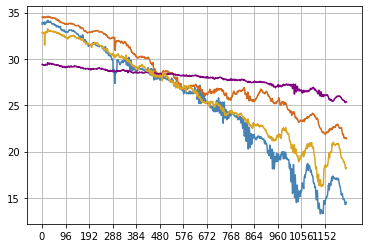

In [2]:
# Obtention des données

b1=pd.read_csv("Box1_Temoin.csv",index_col="X")
b2=pd.read_csv("Box2_Stress_hydrique.csv",index_col="X")
b3=pd.read_csv("Box3_stress_salin.csv",index_col="X")
b4=pd.read_csv("Box4_Temoin.csv",index_col="X")

# Visualisation des données (quadrillage par période)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_ticks = np.arange(0, 1201, 96)
ax.set_xticks(minor_ticks)
ax.plot(b1,c='steelblue')
ax.plot(b2,c='chocolate')
ax.plot(b3,c='purple')
ax.plot(b4,c='goldenrod')
ax.grid(which='both')

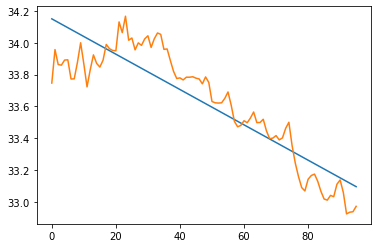

In [3]:
# Calcul sur 1 periode donnees temoin
T0=96

# Donnees Temps
p1=np.array(list(b1.index)[(0*T0):((0+1)*T0)]) # t sur la kieme periode
x1=p1[np.newaxis].T # t sur la kieme periode (reshape)

# Donnees Signal
y1=np.array(list(b1["Y"]))[(0*T0):((0+1)*T0)][np.newaxis].T # y sur la kieme periode

# Modele Regression pour obtenir trend
m1=LinearRegression()
m1.fit(x1,y1) # regression

t1=m1.predict(x1) # trend


d1=y1-t1 # signal detrend
u1=np.array(list(d1.T)[0]) # signal detrend (reshape)

# Calcul des a1, b1, c1
a11=(2/T0)*np.trapz(u1*np.cos(2*m.pi*p1/T0)*(p1[1]-p1[0]))
b11=(2/T0)*np.trapz(u1*np.sin(2*m.pi*p1/T0)*(p1[1]-p1[0]))
c11=np.sqrt(a11**2+b11**2)

# Calcul de E1 et HDR1
E1=(1/T0)*np.trapz((u1**2)*(p1[1]-p1[0]))
HDR1=np.sqrt((E1-(c11**2)/2)/((c11**2)/2))

# Affichage trend et Signal
plt.plot(t1)
plt.plot(y1)


In [4]:
T0=96

# Generalisation sur une boucle applicable à un signal en entree

def features(df,T0):
    
    feats=pd.DataFrame()
    Grs=[]
    cs=[]
    HDRs=[]
    
    
    for k in range(len(list(df.index))//T0):
        
        # Donnees Temps
        pk=np.array(list(df.index)[(k*T0):((k+1)*T0)]) # t sur la kieme periode
        xk=pk[np.newaxis].T # t sur la kieme periode (reshape)
        
        # Donnees Signal
        yk=np.array(list(df["Y"]))[(k*T0):((k+1)*T0)][np.newaxis].T # y sur la kieme periode
        
        # Modele Regression pour obtenir trend
        mk=LinearRegression()
        mk.fit(xk,yk) # regression
        Grn=mk.coef_[0][0]
        tk=mk.predict(xk) # trend
        
        dk=yk-tk # signal detrend
        uk=np.array(list(dk.T)[0]) # signal detrend (reshape)
        
        # Calcul des a1, b1, c1
        a1n=(2/T0)*np.trapz(uk*np.cos(2*m.pi*pk/T0)*(pk[1]-pk[0]))
        b1n=(2/T0)*np.trapz(uk*np.sin(2*m.pi*pk/T0)*(pk[1]-pk[0]))
        c1n=np.sqrt(a1n**2+b1n**2)
        
        # Calcul de E1 et HDR1
        En=(1/T0)*np.trapz((uk**2)*(pk[1]-pk[0]))
        HDRn=100*np.sqrt((En-(c1n**2)/2)/((c1n**2)/2))
        
        #Stockage dans les listes pour le signal de df
        Grs+=[Grn]
        cs+=[c1n]
        HDRs+=[HDRn]
        
    feats["Gr"]=np.array(Grs)
    feats["c1"]=np.array(cs)
    feats["HDR"]=np.array(HDRs)
    
    return feats

In [5]:
f1=features(b1,T0)
f2=features(b2,T0)
f3=features(b3,T0)
f4=features(b4,T0)

f1

,Gr,c1,HDR
0,-0.011079,0.164375,79.420883
1,-0.016346,0.210817,89.262819
2,-0.016702,0.241954,76.894187
3,0.001616,0.571778,90.965345
4,-0.010496,0.167654,173.035630
5,-0.015133,0.131049,164.132885
6,-0.009382,0.222596,200.607431
7,-0.012861,0.121936,511.300943
8,-0.034644,0.203401,347.856019
9,-0.033344,0.310405,185.152258


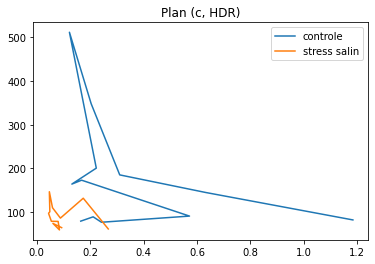

In [10]:
plt.plot(f1["c1"],f1["HDR"],label="controle")
plt.plot(f3["c1"],f3["HDR"],label="stress salin")
plt.title("Plan (c, HDR)")
plt.legend()

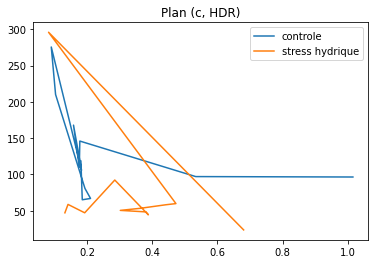

In [11]:
plt.plot(f4["c1"],f4["HDR"],label="controle")
plt.plot(f2["c1"],f2["HDR"],label="stress hydrique")
plt.title("Plan (c, HDR)")
plt.legend()